In [1]:
!pip install gym

In [26]:
import gym
import numpy as np
import random 
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
env = gym.make('FrozenLake-v1')
def mv_avg(x, n):
    return [sum(x[i:i+n]) / n for i in range(len(x)-n)]

def schedule(p0, n_episodes, beta):
    return p0/(np.arange(1, episodes+2))**beta

In [28]:
np.set_printoptions(formatter={'float':'{:0.3f}'.format})
episodes = 2000
jwSteps = 299
lr_0 = 0.9
beta_lr = 0.01
gamma_0 = 0.98
beta_g = 0.001
eps_0 = 0.01
beta_eps = 0.8
jList = []
rList = []
norm_Q = []

lrv = schedule (lr_0, episodes, beta_lr)
gav = schedule (gamma_0, episodes, beta_g)
epsv = schedule (eps_0, episodes, beta_eps)
print(f'lrv_last={lrv[episodes]:.04e}', f'gav_last={gav[episodes]:.04e}',
     f'epsv_last={epsv[episodes]:.04e}')

lrv_last=8.3412e-01 gav_last=9.7258e-01 epsv_last=2.2856e-05


epison: 0/2000, score:0.00
epison: 100/2000, score:0.00
epison: 200/2000, score:1.00,goal!
epison: 300/2000, score:0.00
epison: 400/2000, score:0.00
epison: 500/2000, score:0.00
epison: 600/2000, score:1.00,goal!
epison: 700/2000, score:0.00
epison: 800/2000, score:0.00
epison: 900/2000, score:0.00
epison: 1000/2000, score:1.00,goal!
epison: 1100/2000, score:1.00,goal!
epison: 1200/2000, score:1.00,goal!
epison: 1300/2000, score:0.00
epison: 1400/2000, score:1.00,goal!
epison: 1500/2000, score:0.00
epison: 1600/2000, score:1.00,goal!
epison: 1700/2000, score:0.00
epison: 1800/2000, score:1.00,goal!
epison: 1900/2000, score:1.00,goal!
Score over time: 0.8185


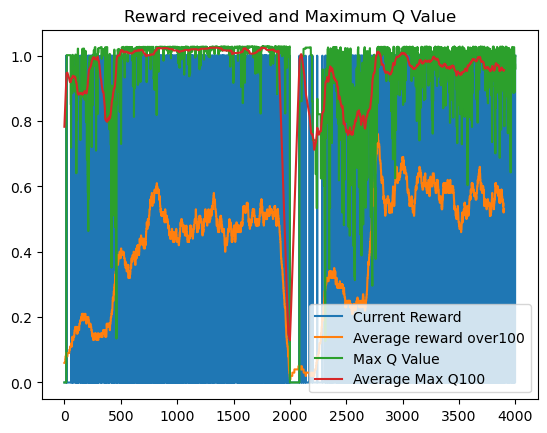

In [30]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
np.random.seed(42)
for e in range (episodes):
    s = env.reset()[0]
    rAll = 0
    done = False
    j = 0;
    lrr = lrv[e]
    gam = gav[e]
    eps = epsv[e]
    
    while j < jwSteps:
        j+=1;
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*eps)
        s1,r,terminated,truncated,info = env.step(a)
        done = terminated or truncated
        if done and e%100 == 0:
            if r == 1:
                print("epison: {}/{}, score:{:.2f},goal!".format(e,episodes,r))
            else:
                print("epison: {}/{}, score:{:.2f}".format(e,episodes,rAll))
            
        Q[s,a] = Q[s,a] + lrr*(r + gam*np.max(Q[s1,:] - Q[s,a]))
        rAll += r
        s = s1
        
        if done: break
    
    norm_Q.append(np.linalg.norm(Q,np.inf))
    jList.append(j)
    rList.append(rAll)
    
print("Score over time: " + str(sum(rList)/episodes))
N_avg = 100
plt.plot(rList,label="Current Reward")
plt.plot(mv_avg(rList,N_avg), label="Average reward over" + str(N_avg))
plt.plot(norm_Q,label="Max Q Value")
plt.plot(mv_avg(norm_Q, N_avg), label="Average Max Q"+str(N_avg))

plt.title('Reward received and Maximum Q Value')
plt.legend(loc='lower right')
plt.show()